<a href="https://colab.research.google.com/github/hnqmz/machine_learning/blob/master/Ssci_Kit_Learnipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT='https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH=os.path.join('datasets', 'housing')
HOUSING_URL=DOWNLOAD_ROOT+'datasets/housing/housing.tgz'
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path=os.path.join(housing_path, 'housing.csv')
  return pd.read_csv(csv_path)
housing=load_housing_data()

In [3]:
housing.head()
#to see the 1st five rows of this frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()
#total number and dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()
#the unique value of thispecific columns

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe().transpose()
#statisticial information of this frame
#null values are ignored, so this is really interesting

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22eca9eba8>,
      dtype=object)

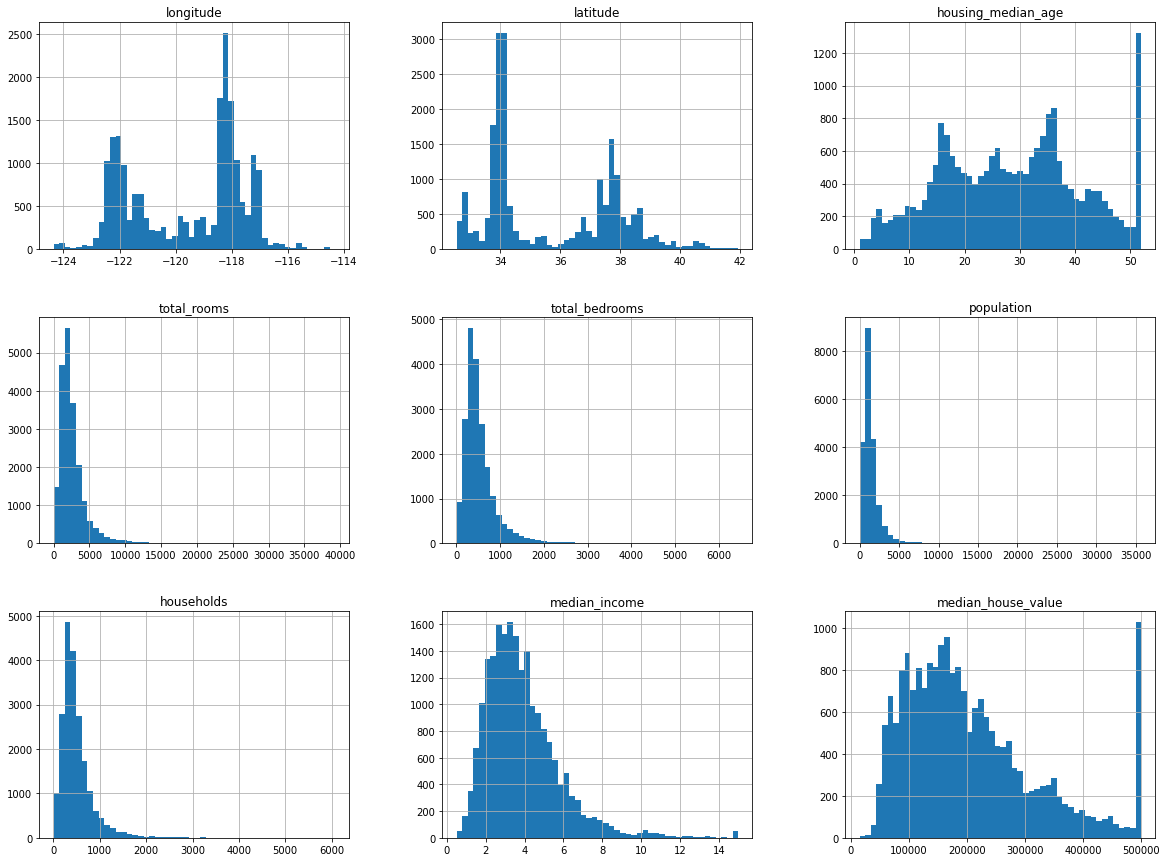

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

In [8]:
import numpy as np
def split_train_test(data, test_ratio):
  #np.random.seed(42) #by using this function, we know that for the same dataset, we'll generate the same train and test set
  shuffled_indices=np.random.permutation(len(data))
  test_set_size=int(len(data)*test_ratio)
  test_indices=shuffled_indices[:test_set_size]
  train_indices=shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set=split_train_test(housing, 0.2) #we can also download it and next time we'll use the same dataset
print(len(train_set))
print(len(test_set))

#you can set a seed or remember it, but hash must be written by youself

16512
4128


In [ ]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
  ids=data[id_column]
  in_test_set=ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.iloc[~in_test_set], data.iloc[in_test_set]
#i still don't know what's crc32, but i am good with apply and i like it

In [12]:
housing_with_id=housing.reset_index()
train_set, test_set=split_train_test_by_id(housing_with_id, 0.2, 'index')
housing_with_id.head()


#or use the latitute and longitute as the identifier
housing['id']=housing['longitute']*1000+housing['latitute']
train_set, test_set=aplit_train_test_by_id(houisng, 0.2, 'id')

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

16512
4128


In [10]:
#let's consider stratified sampling based on median income
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']< 5, 5.0, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


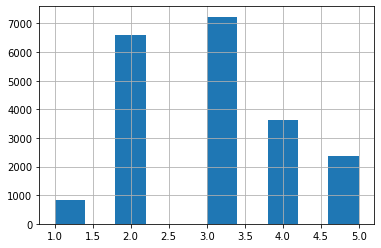

In [11]:
housing['income_cat'].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set=housing.iloc[train_index]
  strat_test_set=housing.loc[test_index]


In [17]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [18]:
#finally, clean the intermeditate columns we added
for set_ in (strat_test_set, strat_train_set):
  set_.drop('income_cat', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [21]:
housing=strat_train_set.copy()

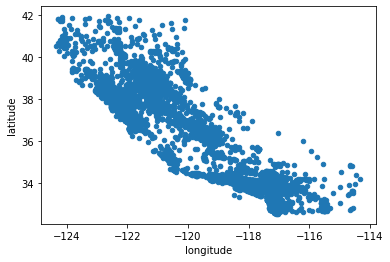

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude')

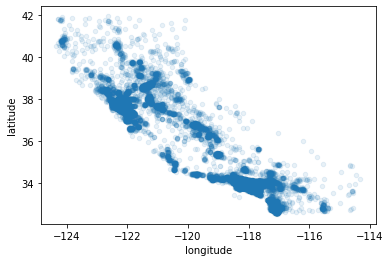

In [24]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

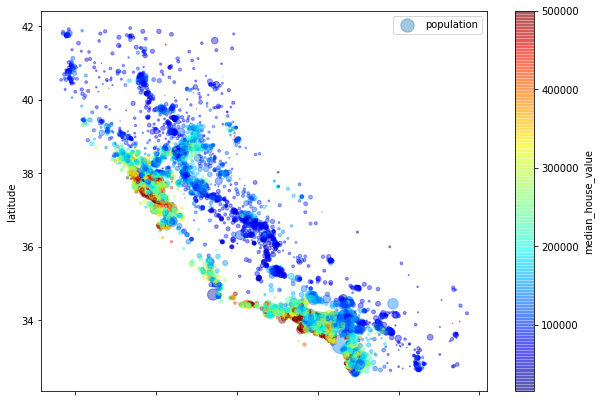

In [28]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

In [29]:
corr_matrix=housing.corr()

In [30]:
print(corr_matrix)
#so, this function ignore the object column, namely, the ocean proximity

                    longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.924478  ...      -0.019583           -0.047432
latitude            -0.924478  1.000000  ...      -0.075205           -0.142724
housing_median_age  -0.105848  0.005766  ...      -0.111360            0.114110
total_rooms          0.048871 -0.039184  ...       0.200087            0.135097
total_bedrooms       0.076598 -0.072419  ...      -0.009740            0.047689
population           0.108030 -0.115222  ...       0.002380           -0.026920
households           0.063070 -0.077647  ...       0.010781            0.064506
median_income       -0.019583 -0.075205  ...       1.000000            0.687160
median_house_value  -0.047432 -0.142724  ...       0.687160            1.000000

[9 rows x 9 columns]


In [33]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

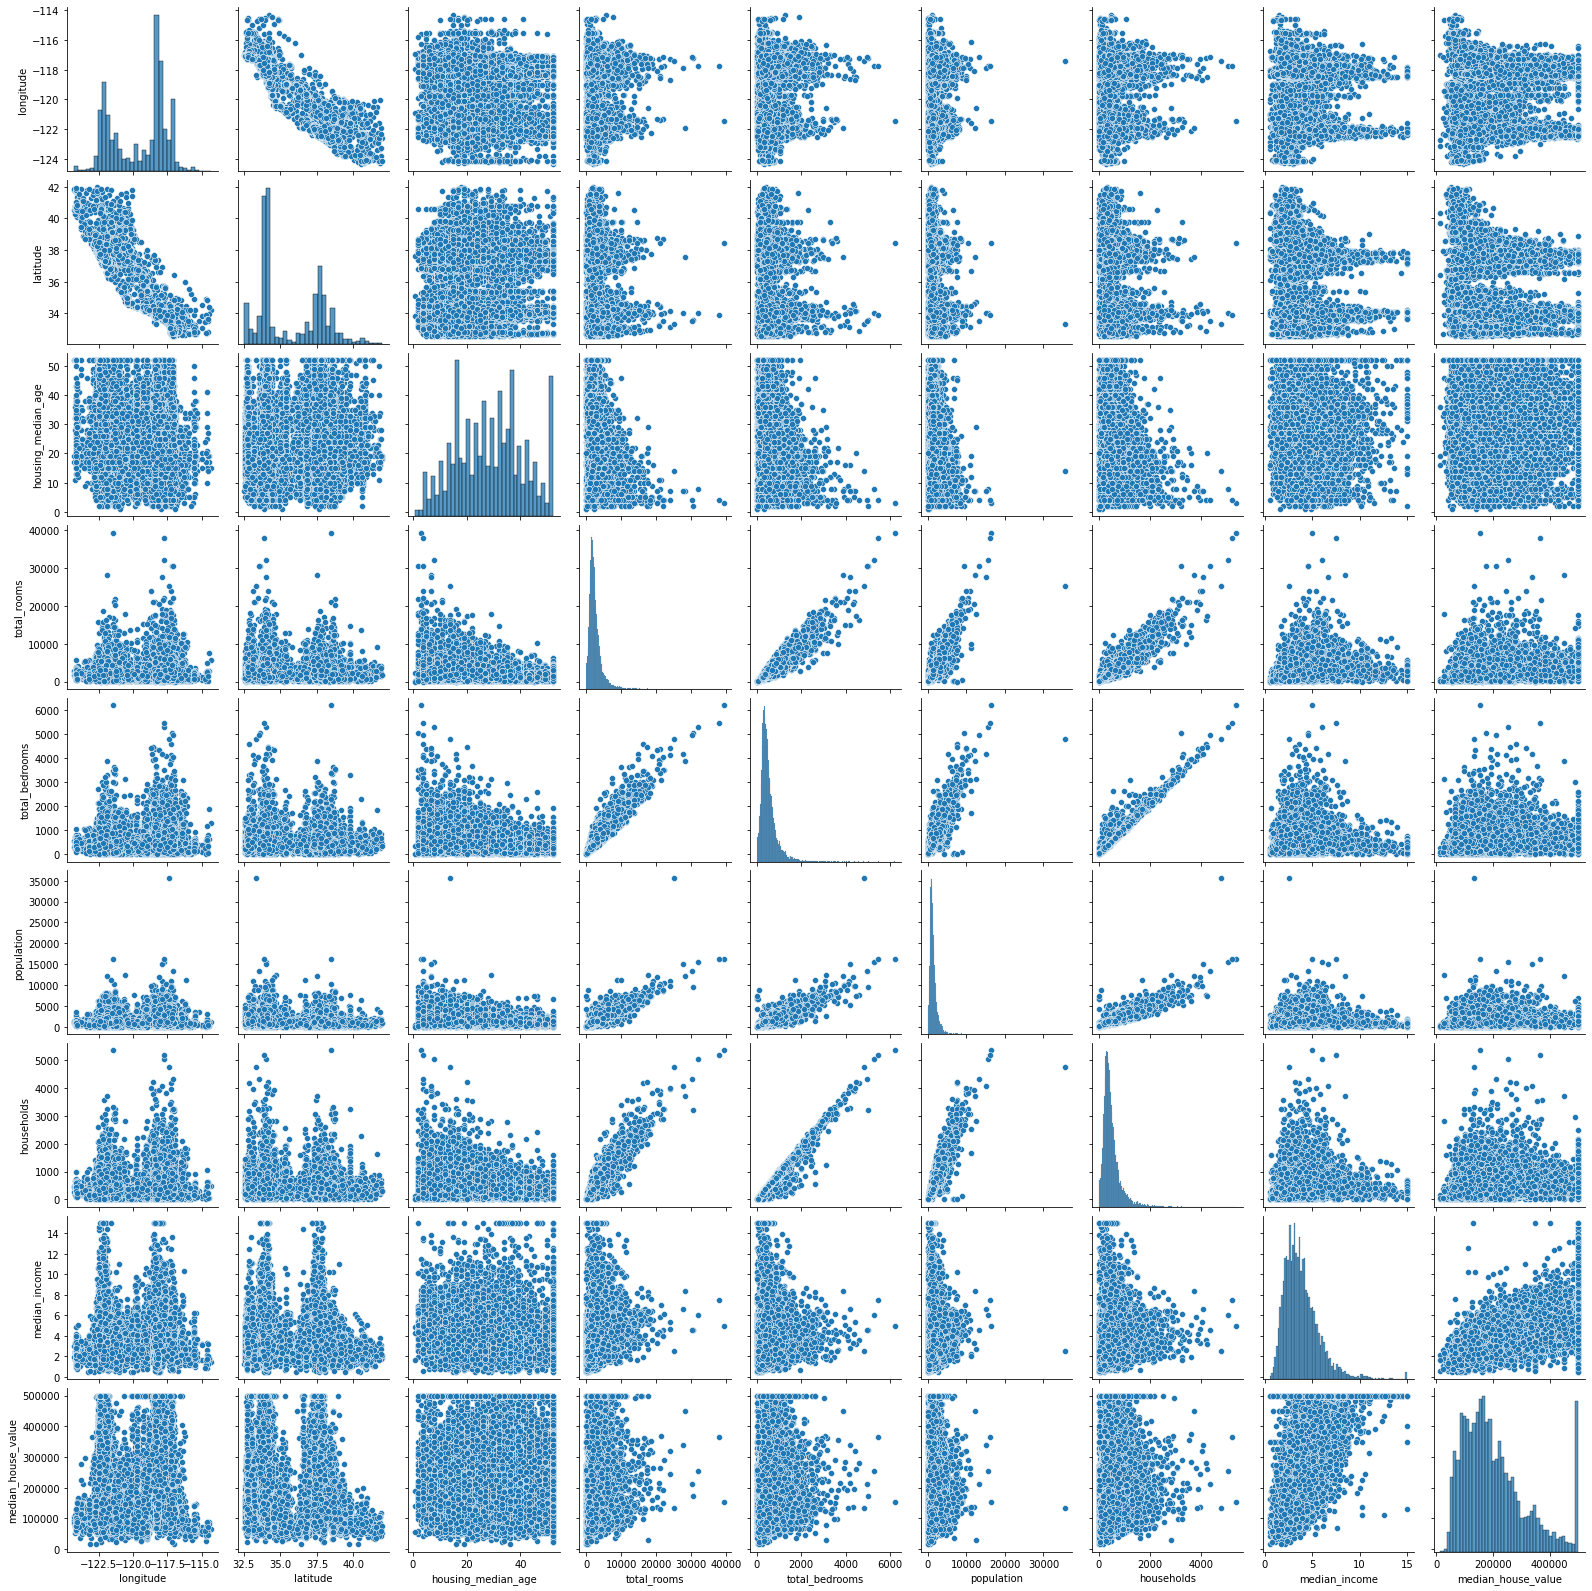

In [35]:
import seaborn as sns
sns.pairplot(housing)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22d492fdd8>,
      dtype=object)

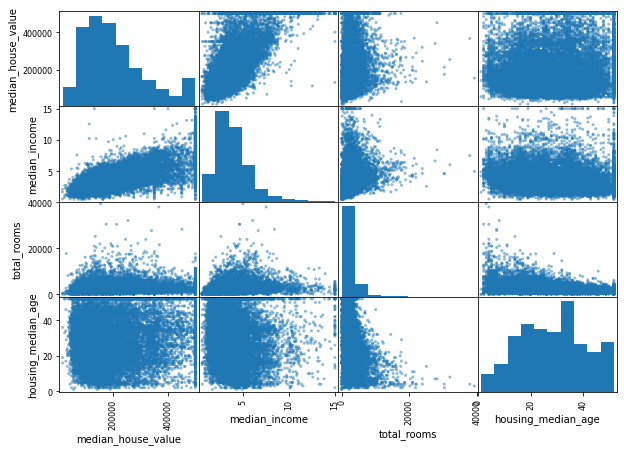

In [36]:
from pandas.plotting import scatter_matrix #so this is similar with seaborn.pairplot, but perform it anyway
attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10, 7))



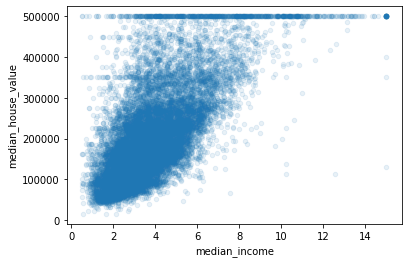

In [37]:
#select a graph and plot it 
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [39]:
#attributes combination, like room per house, bedroom per house, but just ignore it, so now let's feed data to ML 
housing=strat_train_set.drop('median_house_value', axis=1)
housing_labels=strat_train_set['median_house_value'].copy()



In [ ]:
#data cleaning, missing data, etc.
#we have two categorical, by using sklearn(SimpleInputer), or using pandas(drop, dropna, fillna)
housing.dropna(subset=['total_bedrooms'])#option 1
housing.drop(labels='total_bedrooms', axis=1) #option 2
median=housing['total_bedrooms'].median() # have to use it for test set
housing['total_bedrooms'].fillna(median, inplace=True) #option 3

#these 3 methods are really convenient, because we don't need to create another frame


In [41]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [42]:
housing_num=housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [46]:
housing.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [47]:
x=imputer.transform(housing_num)

In [49]:
housing_tr=pd.DataFrame(x, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [52]:
#so far, we know how to deal with numbers, but now we'll tend to deal with text and object
housing_cat=housing[['ocean_proximity']] #watch out, we can see a trick here
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [54]:
#this is like tensorflow.utils.preprocessing, or one hot label, but this is also buildin function in sklearn
from sklearn.preprocessing import OrdinalEncoder #so this encoder is a bit different from one-hot encoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [55]:
ordinal_encoder.categories_  #in this case, a single array

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [64]:
#so, ordinal encoder is not appropriate for this case, we need choose one hot encoding instead
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
# so the output of sklearn can be scipy or numpy

  (0, 0)	1.0


In [65]:
housing_cat_1hot.toarray()
#if the number for that categorical ois really large, you can either replace this feature, or use embedding

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
#custom transformer(duck like language, just like python, and i want to ommit it), we will talk about featrure scaling
#scaling of the target is not required
#fit the scaler to the training data only, then apply it to test_data


pass #custom transformers and pipline and their datatype

In [66]:
housing_tr['ocean_proximity']=housing_cat_encoded
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0.0


In [68]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler() 
housing_tr=std_scaler.fit_transform(housing_tr)



IndexError: ignored

In [70]:
housing_tr[:10] # so far we finish the preprocessing, without using pipeline

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.82311551],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936, -0.82311551],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 ,  1.99314708],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.11904986],
       [ 0.49247384, -0.65929936, -0.92673619,  1.85619316,  2.41221109,
         2.72415407,  2.57097492, -0.44143679, -0.82311551],
       [-0.69645635,  0.94500913, -0.37004716,  0.14369276,  0.1314467 ,
         0.02528492,  0.19413836, -0.17643487, -0.11904986],
       [ 0.53743338, -0.74816776,  1.85670895, -0.18225284, -0.52819807,
        -0.58332755, -0.58571955,  2.36670154, -0.82311551],
       [ 1.16686701, -0.69671763, -0.21099316, -0.27203986, -0

In [71]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(housing_tr, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
some_data=housing.iloc[:10]
some_label=housing_labels.iloc[:10]
good_data=housing_tr[:10]
print(linear_reg.predict(good_data))
print(some_label)
#so the perforamnce of ordinal is not as good as it of 1hot

[207901.47824371 323216.63913328 205102.81901373  75423.92526848
 188676.68780641 169002.36009674 428849.93212787 245407.75003198
 136162.88918455   3286.70066741]
17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
19480    127900.0
8879     500001.0
13685    140200.0
4937      95000.0
4861     500001.0
Name: median_house_value, dtype: float64


In [75]:
from sklearn.metrics import mean_squared_error
housing_pr=linear_reg.predict(housing_tr)
linmse=mean_squared_error(housing_pr, housing_labels)
rmse=np.sqrt(linmse)
rmse

69957.9936286799

In [77]:
#try decision tree
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_tr, housing_labels)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [78]:
housing_tree_pr=tree_reg.predict(housing_tr)
tree_mse=mean_squared_error(housing_labels, housing_tree_pr)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [80]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(tree_reg, housing_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse=np.sqrt(-score)


In [84]:
def display(rmse):
  print("Scores:", rmse)
  print("Mean:", rmse.mean())
  print("Standard deviation:", rmse.std())

In [86]:
display(rmse)

Scores: [65744.16037489 70141.00381047 70647.22381314 72013.3604876
 69150.15254248 74550.83339215 67627.1211309  70194.72576465
 69632.55774805 70673.60866861]
Mean: 70037.47477329324
Standard deviation: 2242.3221999111065


In [87]:
lin_score=cross_val_score(linear_reg, housing_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [88]:
rmse=np.sqrt(-lin_score)
display(rmse)
#they have the same performance

Scores: [68230.55806124 68520.93622918 69600.91124405 74990.90394949
 68974.73419338 72198.27981692 66607.90832448 69745.60718443
 73514.29993282 68943.8776868 ]
Mean: 70132.80166227871
Standard deviation: 2472.4661735128907


In [89]:
from sklearn.ensemble import RandomForestRegressor
tree_reg=RandomForestRegressor()
tree_reg.fit(housing_tr, housing_labels)
score=cross_val_score(tree_reg, housing_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse=np.sqrt(-score)
display(rmse)

Scores: [48076.17072478 46974.07700802 49535.75094287 51363.74644622
 50355.45400838 53487.84356262 48227.07166778 50731.8400517
 52356.32212876 50330.22202851]
Mean: 50143.84985696547
Standard deviation: 1906.758986896984


In [90]:
l=mean_squared_error(tree_reg.predict(housing_tr), housing_labels)
print(np.sqrt(l))

18639.58293206266


In [ ]:
from sklearn.externals import joblib

joblib.dump(my_model, 'my_model.pkl')
my_model_loaded=joblib.load('mu_model.pkl')

#this example shows how to save and load a model

In [91]:
#tune your model Exp. fine_tune a random forest regression
from sklearn.model_selection import GridSearchCV
param_grid=[
            {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
            {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]

forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_tr, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [92]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [94]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

63543.16850791631 {'max_features': 2, 'n_estimators': 3}
53996.077841482685 {'max_features': 2, 'n_estimators': 10}
51917.393679552406 {'max_features': 2, 'n_estimators': 30}
58251.57391108203 {'max_features': 4, 'n_estimators': 3}
52481.50263964789 {'max_features': 4, 'n_estimators': 10}
50104.43889470704 {'max_features': 4, 'n_estimators': 30}
58496.06818275433 {'max_features': 6, 'n_estimators': 3}
52161.340943851494 {'max_features': 6, 'n_estimators': 10}
50394.61926113131 {'max_features': 6, 'n_estimators': 30}
59829.17735039594 {'max_features': 8, 'n_estimators': 3}
52637.871019316204 {'max_features': 8, 'n_estimators': 10}
50971.75780292468 {'max_features': 8, 'n_estimators': 30}
61491.8654342289 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53433.81465271642 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58673.37810157081 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52034.72497112358 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [ ]:
# i also ignore feature importance of sklearn, so learn it next time
#and 95% confidence interval 
